In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# plotly library
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [6]:
df_train = pd.read_csv("train.csv")


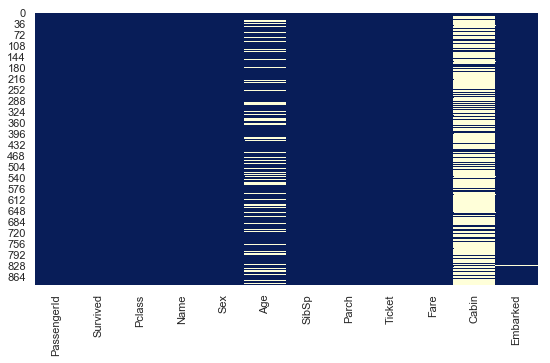

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

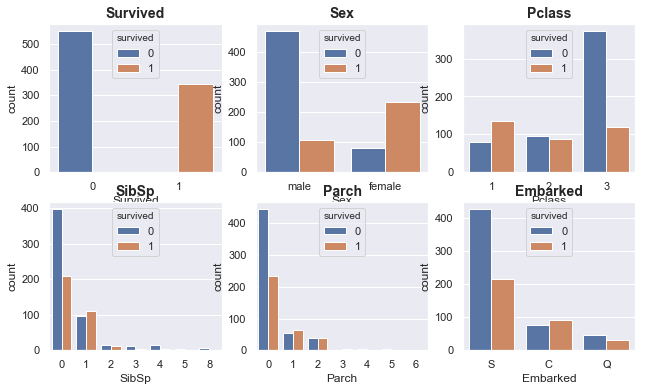

In [8]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 

In [9]:
#Of the 891 passengers in df_train, less than 350 survive.
#Much more women survive than men.
#Also, the chance to survive is much higher in Pclass 1 and 2 than in Class 3.
#Survival rate for passengers travelling with SibSp or Parch is higher than for those travelling alone.
#Passengers embarked in C and Q are more likely to survie than those embarked in S.

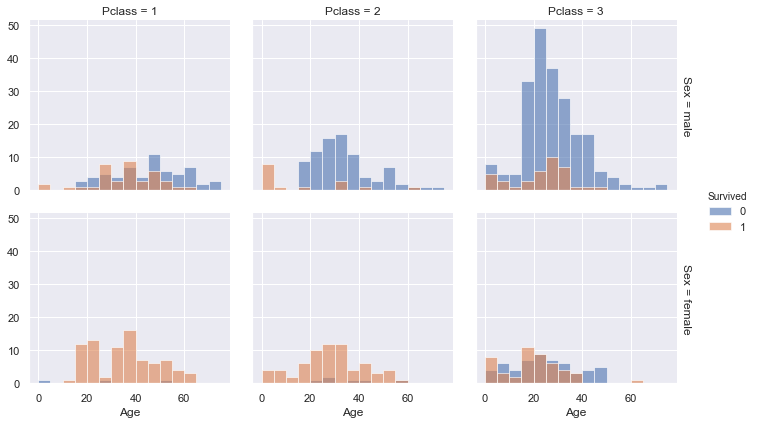

In [10]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show() 
#Distribution of Age as function of Pclass, Sex and Survived



In [11]:
#Best chances to survive for male passengers was in Pclass 1 or being below 5 years old.
#Lowest survival rate for female passengers was in Pclass 3 and being older than 40.
#Most passengers were male, in Pclass 3 and between 15-35 years old.

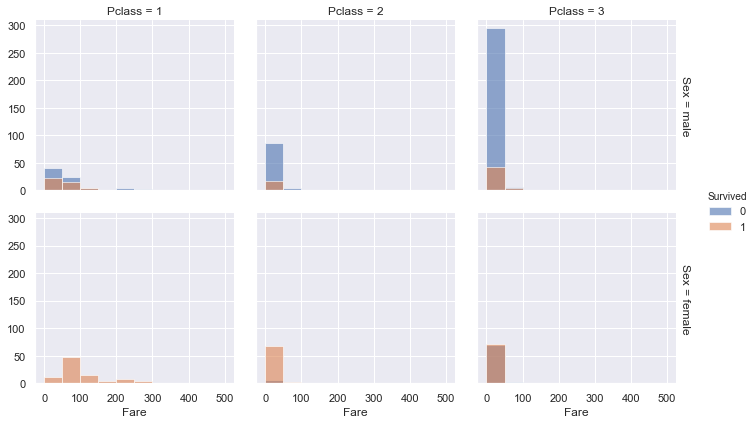

In [12]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()
#Disribution of Fare as function of Pclass, Sex and Survived



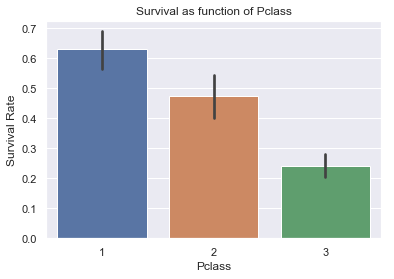

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

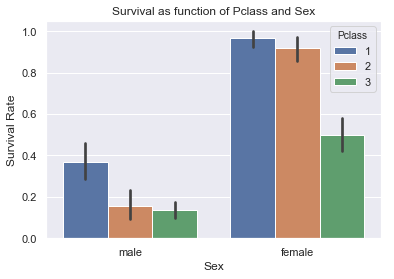

In [14]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()
#Highest survival rate (>0.9) for women in Pclass 1 or 2.
#Lowest survival rate (<0.2) for men in Pclass 3.

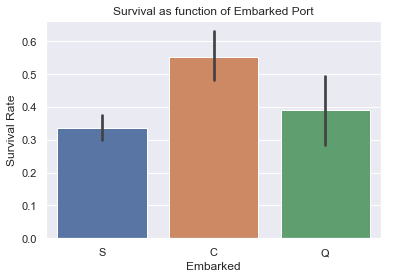

In [15]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

In [16]:
#Passengers embarked in "S" had the lowest survival rate, those embarked in "C" the highest.


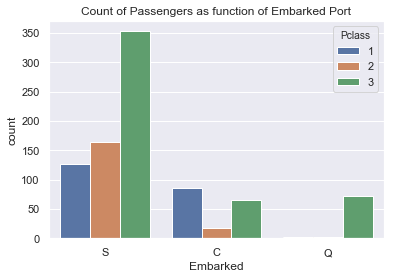

In [17]:
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

In [18]:
#For every class, the largest count of Passengers embarked in "S".


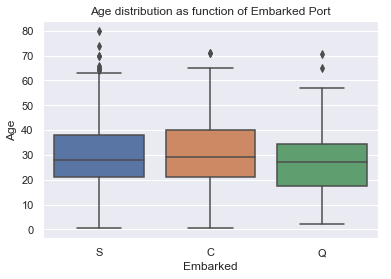

In [19]:
sns.boxplot(x='Embarked', y='Age', data=df_train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

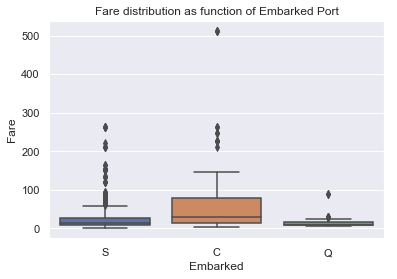

In [20]:
# We see all embarked lie in 20-37 years 
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [21]:
#Mean fare for Passengers embarked in "C" was higher.



C:\Users\Laptop\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning:

The `split` parameter has been renamed to `dodge`.



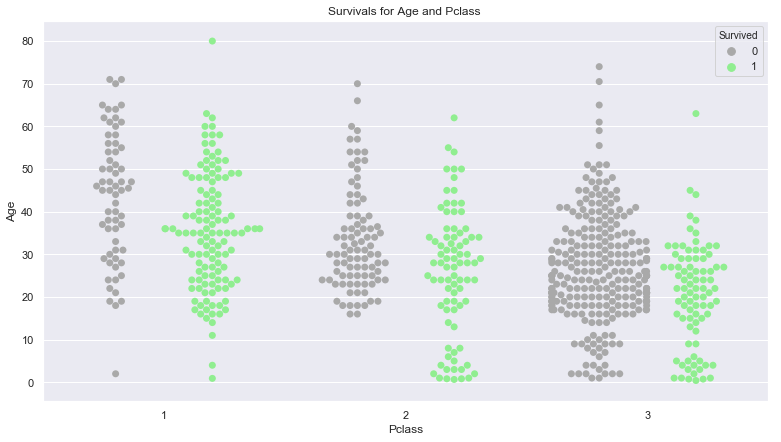

In [29]:
cm_surv = ["darkgrey" , "lightgreen"]

fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=df_train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()


In [ ]:
#Here, the high survival rate for kids in Pclass 2 is easily observed.
#Also, it becomes more obvious that for passengers older than 40 the best chance to survive is in Pclass 1,
#and smallest chance in Pclass 3

C:\Users\Laptop\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



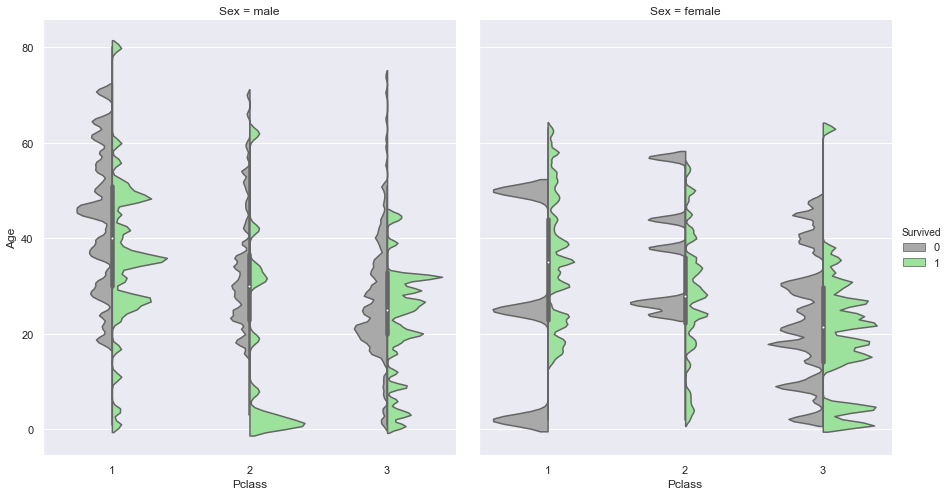

In [22]:

g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="violin", split=True, bw=0.05, palette=cm_surv, height=7, aspect=.9, s=7)

In [23]:
#------------------Data Wrangling and Feature Engineering------------------

In [24]:
# New Features: 'FamilySize' , 'Alone'
for df in [df_train] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
    


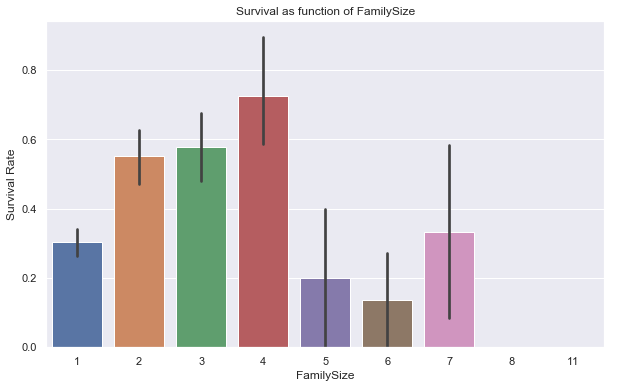

In [25]:
plt.subplots(figsize=(10,6))
sns.barplot(x='FamilySize' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of FamilySize")
plt.show()

In [26]:
#  Fill NaN with mean or mode
# Embarked
df_train.info()
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])

# Fare
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
Alone          891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 80.1+ KB


In [27]:
for df in [df_train]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        
    

In [28]:
df_train_ml = df_train.copy()

df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)

df_train_ml.dropna(inplace=True)
for df in [df_train_ml]:

    df.drop(['SibSp'], axis=1, inplace=True)
    df.drop(['Parch'], axis=1, inplace=True)
    df.drop(['Alone'], axis=1, inplace=True)
df_train_ml.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Survived      714 non-null int64
Fare          714 non-null float64
FamilySize    714 non-null int64
Age_bin       714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 31.4 KB


In [ ]:
#--------------- My Titanic analysis----------------------

In [ ]:
#Of the 891 passengers in df_train, less than 350 survive.
#Much more women survive than men.
#Also, the chance to survive is much higher in Pclass 1 and 2 than in Class 3.
#Survival rate for passengers travelling with SibSp or Parch is higher than for those travelling alone.
#Passengers embarked in C and Q are more likely to survie than those embarked in S.
#Distribution of Age as function of Pclass, Sex and Survived
#Highest survival rate (>0.9) for women in Pclass 1 or 2.
#Lowest survival rate (<0.2) for men in Pclass 3.
#Passengers embarked in "S" had the lowest survival rate, those embarked in "C" the highest.
#For every class, the largest count of Passengers embarked in "S".
# We see all embarked lie in 20-37 years 
#Mean fare for Passengers embarked in "C" was higher.
#Here, the high survival rate for kids in Pclass 2 is easily observed.
#Also, it becomes more obvious that for passengers older than 40 the best chance to survive is in Pclass 1,
#and smallest chance in Pclass 3